## Day2

* 테마주 수집(ft. 전기자동차)
    * 팀장님이 우리 회사와 유사한 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
    * 코스피에서 해당 테마의 시가총액이 가장 많은 종목을 찾아주세요.
    * 해당 테마의 거래량이 가장 많은 종목을 찾아주에세요.
    * 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
    * 거래대금이 20위 안에 있는 코스피 종목 중에 "동일업종 PER"가 가장 낮은 종목은 무엇일까요?


* 주가 데이터 시각화
    1. 볼린저밴드
    1. 캔들차트
    1. 상관계수


## 테마주 수집하기

https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=227

In [78]:
# 라이브러리 로드
import pandas as pd

In [79]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

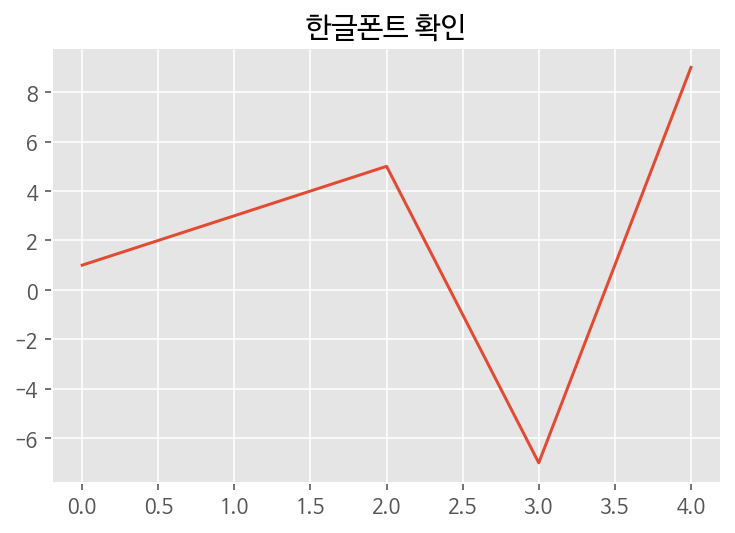

In [80]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트 확인")

In [81]:
# 수집할 테마 주소
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=52"

In [82]:
# 해당 테마 읽어오기
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [83]:
table[2].dropna(how="all").dropna(axis=1)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0
2,메가스터디 *,테마 편입 사유,12450.0,550.0,+4.62%,12400.0,12450.0,352125.0,4263.0,172152.0
3,멀티캠퍼스 *,테마 편입 사유,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0
4,메가엠디 *,테마 편입 사유,3850.0,130.0,+3.49%,3850.0,3855.0,684679.0,2615.0,292942.0
5,청담러닝 *,테마 편입 사유,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0
6,NE능률 *,테마 편입 사유,2725.0,65.0,+2.44%,2720.0,2725.0,46994.0,126.0,42585.0
7,비트컴퓨터 *,테마 편입 사유,9020.0,120.0,+1.35%,9010.0,9020.0,442369.0,4009.0,321071.0
8,캐리소프트 *,테마 편입 사유,4245.0,45.0,+1.07%,4245.0,4250.0,17186.0,71.0,18387.0
9,아이스크림에듀 *,테마 편입 사유,8130.0,60.0,+0.74%,8130.0,8140.0,126373.0,1027.0,60417.0
10,디지털대성 *,테마 편입 사유,6860.0,50.0,+0.73%,6850.0,6860.0,63427.0,431.0,31088.0


In [84]:
df = table[2].dropna(how="all")
df = df.dropna(axis=1)
df.shape

(25, 10)

In [85]:
import datetime

today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2020-10-29'

In [86]:
df["조회일자"] = today

In [87]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0,2020-10-29
2,메가스터디 *,테마 편입 사유,12450.0,550.0,+4.62%,12400.0,12450.0,352125.0,4263.0,172152.0,2020-10-29
3,멀티캠퍼스 *,테마 편입 사유,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0,2020-10-29
4,메가엠디 *,테마 편입 사유,3850.0,130.0,+3.49%,3850.0,3855.0,684679.0,2615.0,292942.0,2020-10-29
5,청담러닝 *,테마 편입 사유,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0,2020-10-29


In [88]:
vol = df[["종목명", "거래량"]]
vol = vol.set_index("종목명")
vol

,거래량
종목명,
YBM넷 *,1463802.0
메가스터디 *,352125.0
멀티캠퍼스 *,167772.0
메가엠디 *,684679.0
청담러닝 *,76429.0
NE능률 *,46994.0
비트컴퓨터 *,442369.0
캐리소프트 *,17186.0
아이스크림에듀 *,126373.0


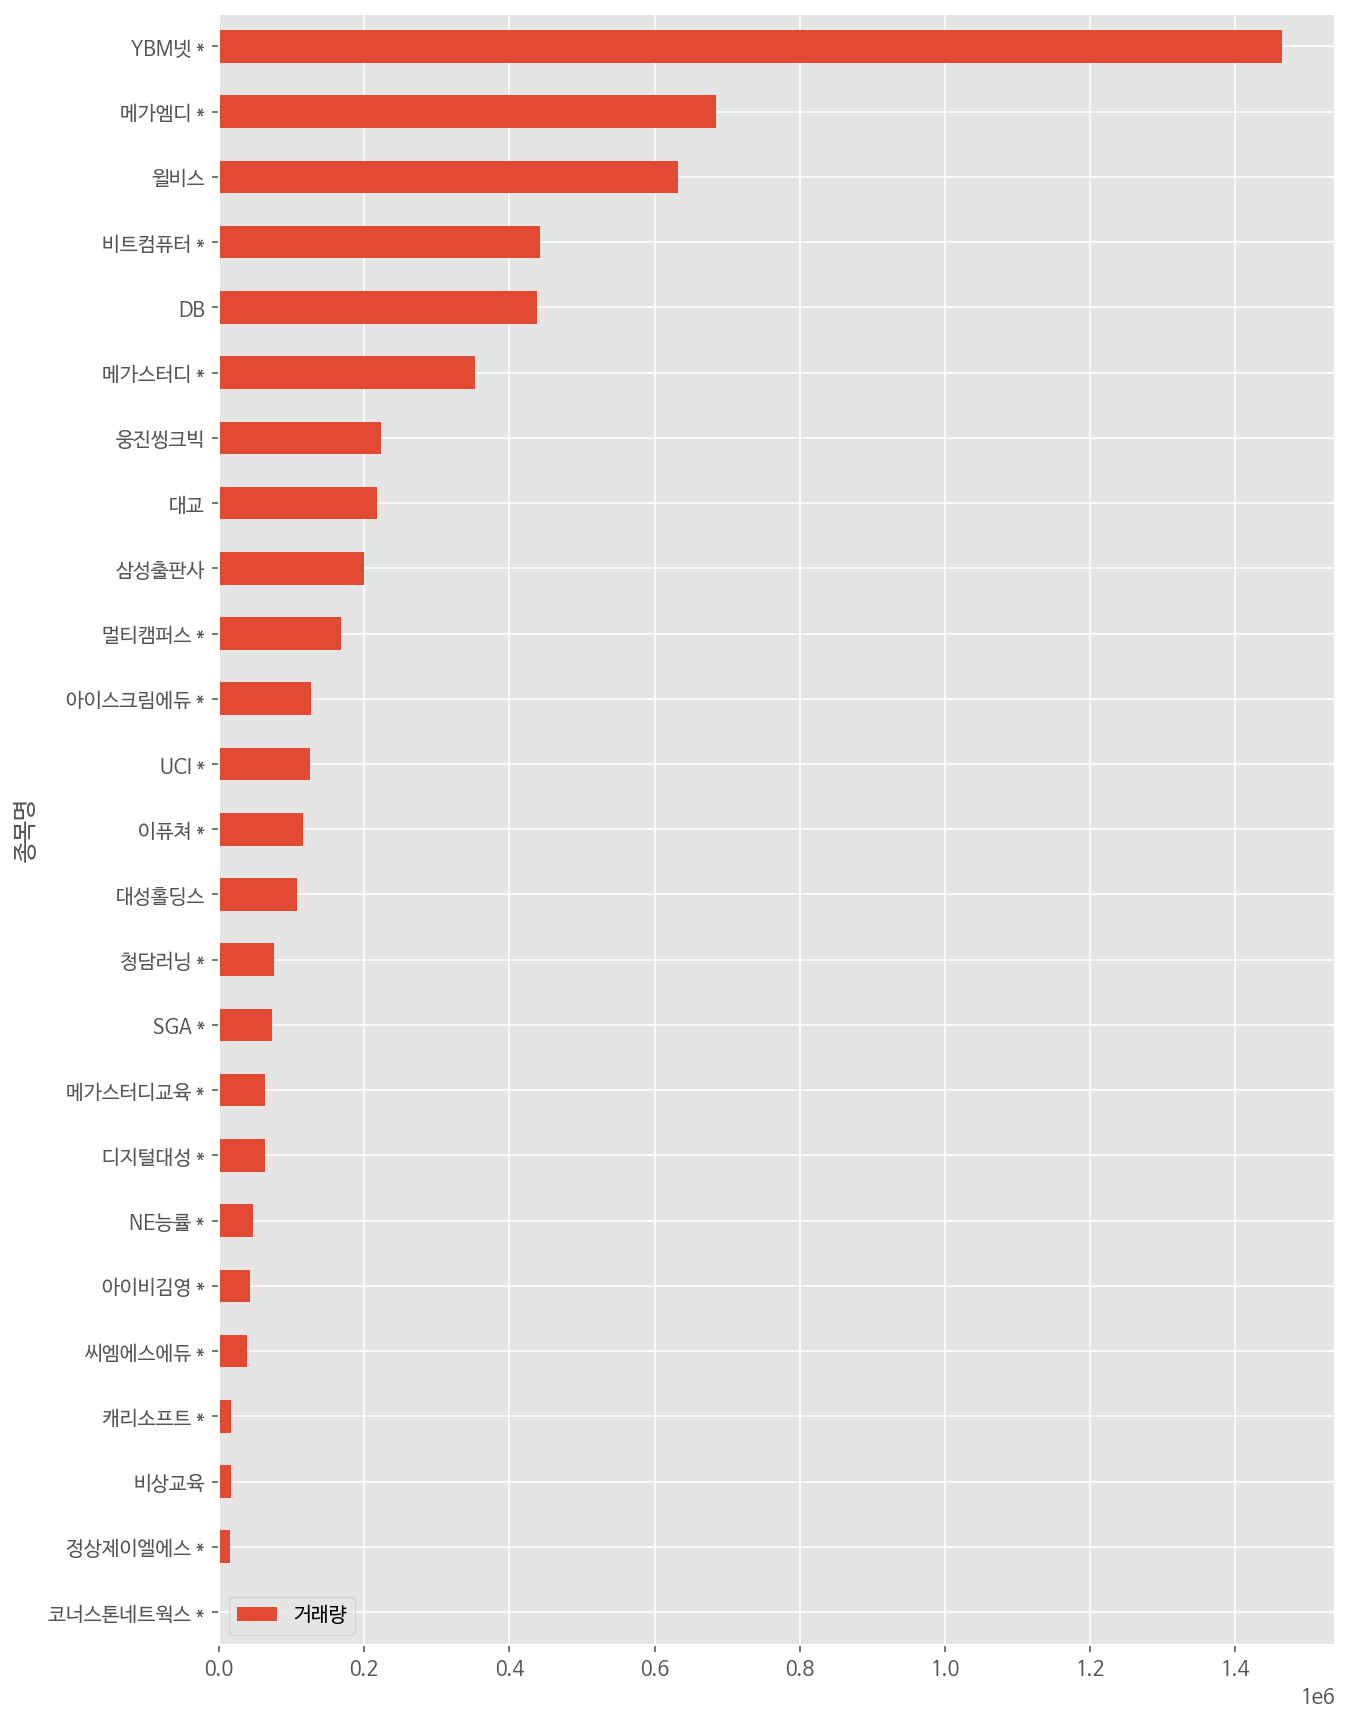

In [89]:
vol = df[["종목명", "거래량"]]
vol = vol.set_index("종목명")
vol.sort_values(by=["거래량"]).tail(30).plot.barh(figsize=(10, 15))

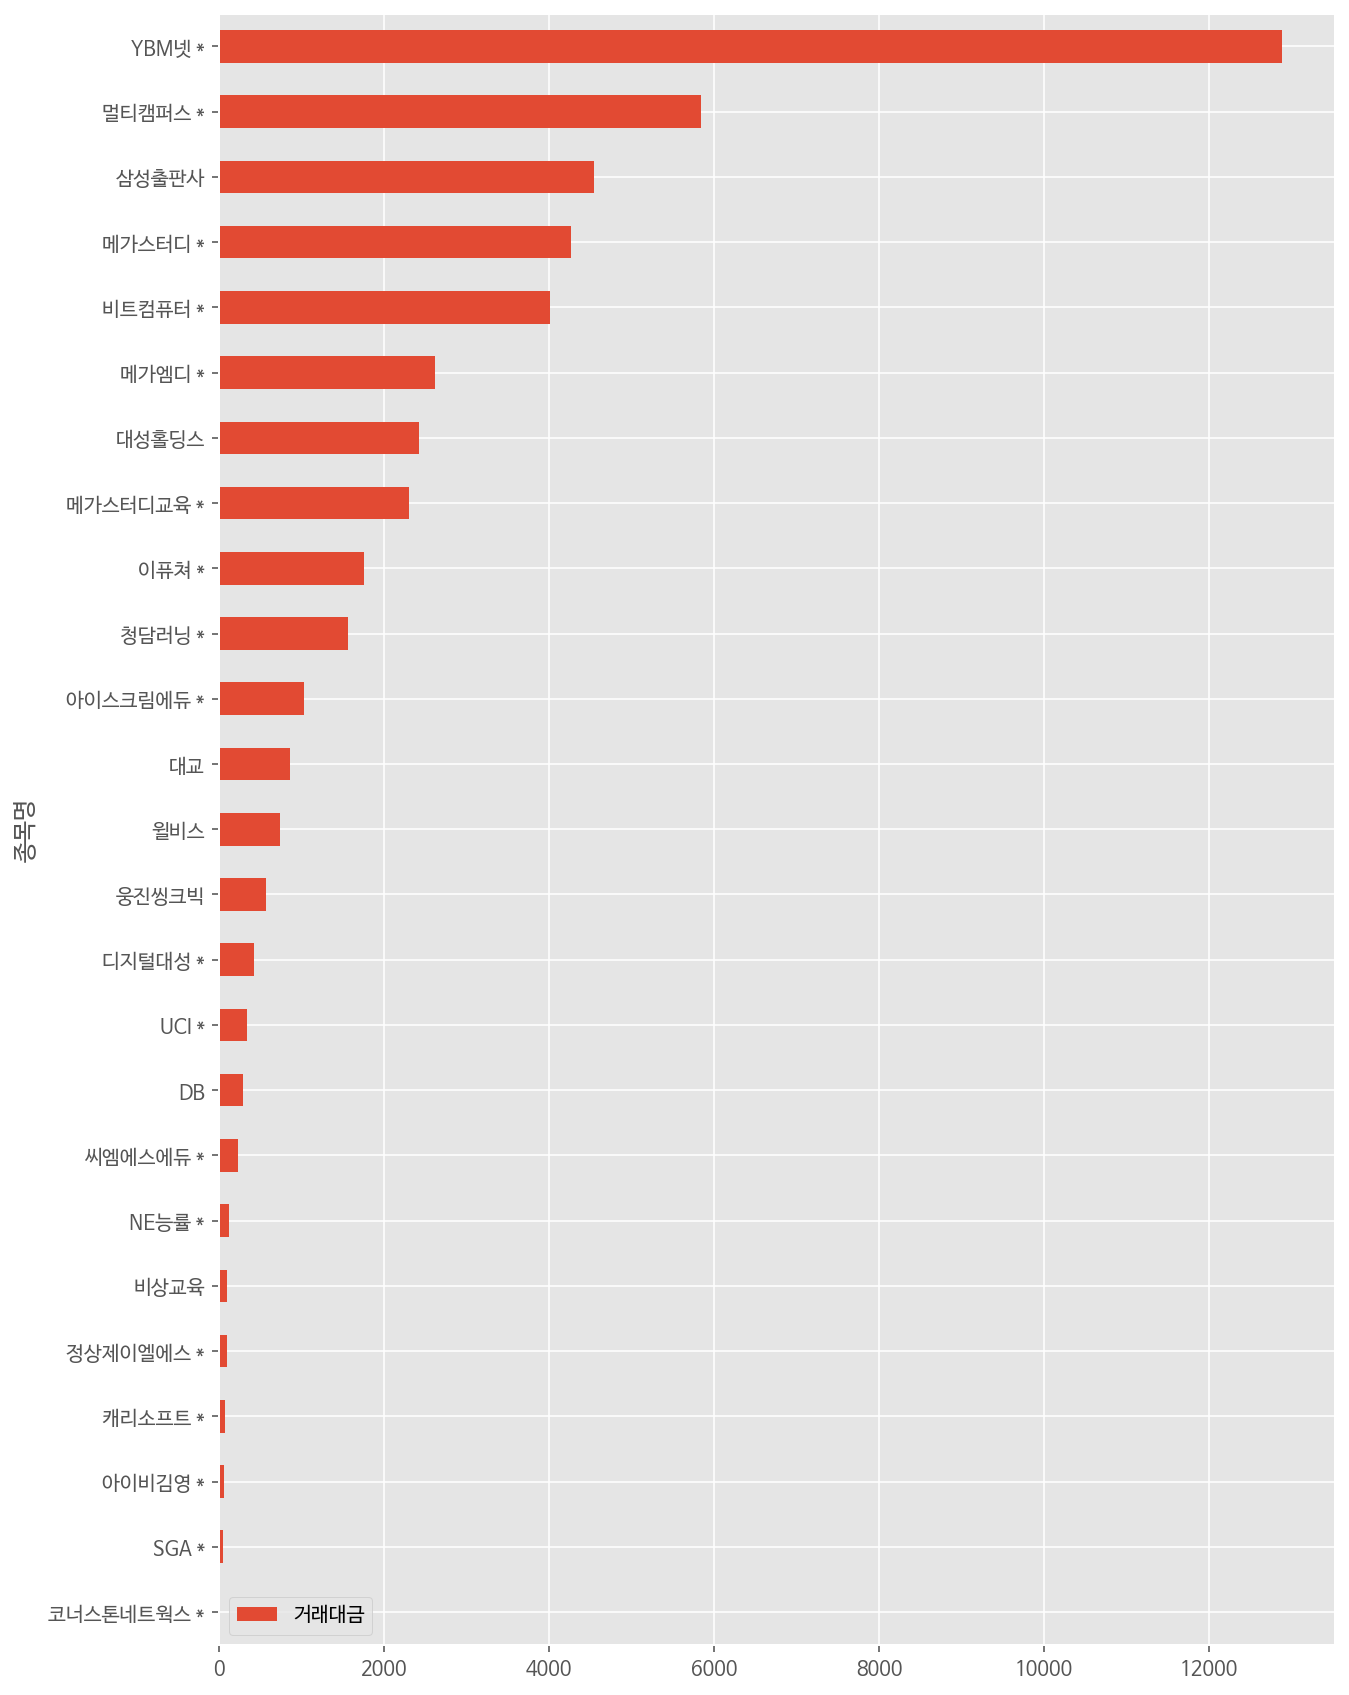

In [90]:
price = df[["종목명", "거래대금"]]
price = price.set_index("종목명")
price.sort_values(by=["거래대금"]).tail(30).plot.barh(figsize=(10, 15))

## 종목코드 수집
* 종목코드는 read_html 로 수집이 되지 않습니다.
* 그래서 직접 수집을 합니다.

In [91]:
import requests
from bs4 import BeautifulSoup as bs

In [92]:
response = requests.get(url)
response.text

'\n\n\n\n\n\n\n<!--  global include -->\n\n\t\n\t\n\t\n\t\n\t\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t<title>교육/온라인 교육 : 네이버 금융</title>\n\t\t\t\n\t\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="http://finance.naver.com/sise/sise_group_detail.nhn"/>\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="교육/온라인 교육 : 네이버 금융"/>\n\t\t     \n\t\t\n\t\t\n\t\t\t\n\t\t\t   <meta property="og:description" content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳"/>\n\t\t    \n\t\t    \n\t\t\n\t\t \n\t\t\t\n\t\t\t    <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n\t\t    \n\t\t    \n\t\t\n    \n\n<meta property="og:type" content="article"/>\n<meta property="og:artic

In [93]:
html = bs(response.text, "lxml")

In [94]:
table_2 = html.select("table")[2]
table_2

<table cellpadding="0" cellspacing="0" class="type_5" style="margin:0 0 10px 0 ;" summary="업종별 시세 리스트">
<caption>업종별 시세</caption>
<colgroup>
<col width="*"/>
<col width="11%"/>
<col width="9%"/>
<col width="9%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="6%"/>
</colgroup>
<thead>
<tr style="height:29px">
<th colspan="2">종목명</th>
<th>현재가</th>
<th>전일비</th>
<th>등락률</th>
<th>매수호가</th>
<th>매도호가</th>
<th>거래량</th>
<th>거래대금</th>
<th>전일거래량</th>
<th>토론실</th>
</tr>
<tr>
<td class="blank_09" colspan="12"></td>
</tr>
</thead>
<tbody>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td class="name"><div class="name_area"><a href="/item/main.nhn?code=057030">YBM넷</a> <span class="dot">*</span></div></td>
<td>
<div class="theme_info_area">
<a class="btn_history" href="javascript:;" onmouseout="mouseThemeToggle(this)" onmouseover="mouseThemeToggle(this)">
<span class="blind">테마 편입 사유</span>
</a>
<div class="info_layer_wrap" styl

In [95]:
a_tags = table_2.select("a")
a_tags

[<a href="/item/main.nhn?code=057030">YBM넷</a>,
 <a class="btn_history" href="javascript:;" onmouseout="mouseThemeToggle(this)" onmouseover="mouseThemeToggle(this)">
 <span class="blind">테마 편입 사유</span>
 </a>,
 <a href="/item/board.nhn?code=057030"><img alt="토론실" height="13" src="https://ssl.pstatic.net/imgstock/images5/ico_debatebl2.gif" width="15"/></a>,
 <a href="/item/main.nhn?code=072870">메가스터디</a>,
 <a class="btn_history" href="javascript:;" onmouseout="mouseThemeToggle(this)" onmouseover="mouseThemeToggle(this)">
 <span class="blind">테마 편입 사유</span>
 </a>,
 <a href="/item/board.nhn?code=072870"><img alt="토론실" height="13" src="https://ssl.pstatic.net/imgstock/images5/ico_debatebl2.gif" width="15"/></a>,
 <a href="/item/main.nhn?code=067280">멀티캠퍼스</a>,
 <a class="btn_history" href="javascript:;" onmouseout="mouseThemeToggle(this)" onmouseover="mouseThemeToggle(this)">
 <span class="blind">테마 편입 사유</span>
 </a>,
 <a href="/item/board.nhn?code=067280"><img alt="토론실" height="13" src=

In [96]:
a_tags[0]["href"].split("=")[-1]

'057030'

In [97]:
a_tags[0]["href"].split("=")[-1]

'057030'

In [98]:
item_list = []
for a_tag in a_tags:
    item_code = a_tag["href"].split("=")[-1]
    item_list.append(item_code)

In [99]:
item_list

['057030',
 'javascript:;',
 '057030',
 '072870',
 'javascript:;',
 '072870',
 '067280',
 'javascript:;',
 '067280',
 '133750',
 'javascript:;',
 '133750',
 '096240',
 'javascript:;',
 '096240',
 '053290',
 'javascript:;',
 '053290',
 '032850',
 'javascript:;',
 '032850',
 '317530',
 'javascript:;',
 '317530',
 '289010',
 'javascript:;',
 '289010',
 '068930',
 'javascript:;',
 '068930',
 '225330',
 'javascript:;',
 '225330',
 '068290',
 'javascript:;',
 '068290',
 '016710',
 'javascript:;',
 '016710',
 '095720',
 'javascript:;',
 '095720',
 '008600',
 'javascript:;',
 '008600',
 '033110',
 'javascript:;',
 '033110',
 '339950',
 'javascript:;',
 '339950',
 '038340',
 'javascript:;',
 '038340',
 '040420',
 'javascript:;',
 '040420',
 '100220',
 'javascript:;',
 '100220',
 '012030',
 'javascript:;',
 '012030',
 '215200',
 'javascript:;',
 '215200',
 '049470',
 'javascript:;',
 '049470',
 '134060',
 'javascript:;',
 '134060',
 '019680',
 'javascript:;',
 '019680']

In [100]:
df.shape

(25, 11)

In [101]:
df.head(1)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0,2020-10-29


In [102]:
item_code_list = pd.Series(item_list).drop_duplicates()
item_code_list = item_code_list.tolist()

In [103]:
len(item_code_list)

26

In [104]:
item_code_list

['057030',
 'javascript:;',
 '072870',
 '067280',
 '133750',
 '096240',
 '053290',
 '032850',
 '317530',
 '289010',
 '068930',
 '225330',
 '068290',
 '016710',
 '095720',
 '008600',
 '033110',
 '339950',
 '038340',
 '040420',
 '100220',
 '012030',
 '215200',
 '049470',
 '134060',
 '019680']

In [105]:
item_code_list.remove('javascript:;')
item_code_list

['057030',
 '072870',
 '067280',
 '133750',
 '096240',
 '053290',
 '032850',
 '317530',
 '289010',
 '068930',
 '225330',
 '068290',
 '016710',
 '095720',
 '008600',
 '033110',
 '339950',
 '038340',
 '040420',
 '100220',
 '012030',
 '215200',
 '049470',
 '134060',
 '019680']

In [106]:
len(item_code_list)

25

In [107]:
df["종목코드"] = item_code_list

In [108]:
df

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
1,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0,2020-10-29,057030
2,메가스터디 *,테마 편입 사유,12450.0,550.0,+4.62%,12400.0,12450.0,352125.0,4263.0,172152.0,2020-10-29,072870
3,멀티캠퍼스 *,테마 편입 사유,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0,2020-10-29,067280
4,메가엠디 *,테마 편입 사유,3850.0,130.0,+3.49%,3850.0,3855.0,684679.0,2615.0,292942.0,2020-10-29,133750
5,청담러닝 *,테마 편입 사유,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0,2020-10-29,096240
6,NE능률 *,테마 편입 사유,2725.0,65.0,+2.44%,2720.0,2725.0,46994.0,126.0,42585.0,2020-10-29,053290
7,비트컴퓨터 *,테마 편입 사유,9020.0,120.0,+1.35%,9010.0,9020.0,442369.0,4009.0,321071.0,2020-10-29,032850
8,캐리소프트 *,테마 편입 사유,4245.0,45.0,+1.07%,4245.0,4250.0,17186.0,71.0,18387.0,2020-10-29,317530
9,아이스크림에듀 *,테마 편입 사유,8130.0,60.0,+0.74%,8130.0,8140.0,126373.0,1027.0,60417.0,2020-10-29,289010
10,디지털대성 *,테마 편입 사유,6860.0,50.0,+0.73%,6850.0,6860.0,63427.0,431.0,31088.0,2020-10-29,068930


## 종목상세정보

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [109]:
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=019680'

In [110]:
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [111]:
tables

[                  0                                    1                      2
 0  전일  4,040  4,040  고가  4,0104,010  (상한가  5,2505,250  )  거래량  217,746  217,746
 1    시가  3,9703,970       저가  3,9403,940  (하한가  2,830  )     거래대금  860  860  백만,
      매도상위      거래량    매수상위      거개량
 0     NaN      NaN     NaN      NaN
 1    키움증권  56058.0    키움증권  84444.0
 2      삼성  32917.0  NH투자증권  33407.0
 3  미래에셋대우  27352.0    한국증권  18724.0
 4    한국증권  18491.0    CS증권  10898.0
 5    CS증권  15849.0      대신  10288.0
 6  외국계추정합  15849.0   -4679  11170.0,
       날짜      종가     전일비      외국인      기관
 0    NaN     NaN     NaN      NaN     NaN
 1  10/29  3945.0  하향  95   -24214   -5589
 2  10/28  4040.0  상향  60  +40,475   -7163
 3  10/27  3980.0  상향  50   -90795  -42164
 4  10/26  3930.0  하향  15    -6005  +8,683
 5  10/23  3945.0  상향  15    -2874  +2,440
 6  10/22  3930.0      보합    -1029  +2,321
 7    NaN     NaN     NaN      NaN     NaN,
        주요재무정보 최근 연간 실적                    ... 최근 분기 실적                

In [112]:
tables[5]

,0,1
0,시가총액,"3,342 억원"
1,시가총액순위,코스피 367위
2,상장주식수,84702850
3,액면가l매매단위,500원 l 1주


### 컬럼명과 값 형태로 되어 있는 테이블만 수집

In [113]:
# 컬럼의 수가 2인 테이블만 따로 list로 생성
item_info = []
for table in tables:
    if table.shape[1] == 2:
        item_info.append(table)

In [114]:
# 리스트의 값 확인
item_info

[          0            1
 0      시가총액    3,342  억원
 1    시가총액순위     코스피 367위
 2     상장주식수     84702850
 3  액면가l매매단위  500원  l  1주,              0         1
 0  외국인한도주식수(A)  84702850
 1  외국인보유주식수(B)   6156230
 2  외국인소진율(B/A)     7.27%,            0                 1
 0  투자의견l목표주가  3.50매수  l  4,500
 1   52주최고l최저   6,910  l  3,040,                    0                 1
 0   PERlEPS(2020.06)      N/A  l  -65원
 1          추정PERlEPS       N/A  l  N/A
 2  PBRlBPS (2020.06)  0.59배  l  6,715원
 3      배당수익률l2019.12             4.31%,           0        1
 0  동일업종 PER  -23.26배
 1  동일업종 등락률   +0.55%]

### concat을 통해 데이터를 병합

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [115]:
df_item = pd.concat(item_info)
df_item

,0,1
0,시가총액,"3,342 억원"
1,시가총액순위,코스피 367위
2,상장주식수,84702850
3,액면가l매매단위,500원 l 1주
0,외국인한도주식수(A),84702850
1,외국인보유주식수(B),6156230
2,외국인소진율(B/A),7.27%
0,투자의견l목표주가,"3.50매수 l 4,500"
1,52주최고l최저,"6,910 l 3,040"
0,PERlEPS(2020.06),N/A l -65원


### transpose를 통해 행과 열의 위치를 변경

In [116]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률
1,"3,342 억원",코스피 367위,84702850,500원 l 1주,84702850,6156230,7.27%,"3.50매수 l 4,500","6,910 l 3,040",N/A l -65원,N/A l N/A,"0.59배 l 6,715원",4.31%,-23.26배,+0.55%


### 개별 주가 정보를 수집하는 함수를 생성

In [117]:
import time

def get_item_info(item_code):
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    # 컬럼의 수가 2인 테이블만 따로 list로 생성
    item_info = []
    for table in tables:
        if table.shape[1] == 2:
            item_info.append(table)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    df_item["종목코드"] = item_code
    time.sleep(0.5)
    return df_item

In [118]:
get_item_info(item_code)

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,종목코드
1,"3,342 억원",코스피 367위,84702850,500원 l 1주,84702850,6156230,7.27%,"3.50매수 l 4,500","6,910 l 3,040",N/A l -65원,N/A l N/A,"0.59배 l 6,715원",4.31%,-23.26배,+0.55%,019680


## tqdm은?
* 오래 걸리는 작업의 진행 게이지를 표시
* https://tqdm.github.io/

In [119]:
from tqdm import tqdm, tqdm_pandas

tqdm_pandas(tqdm)

In [120]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
1,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0,2020-10-29,057030
2,메가스터디 *,테마 편입 사유,12450.0,550.0,+4.62%,12400.0,12450.0,352125.0,4263.0,172152.0,2020-10-29,072870
3,멀티캠퍼스 *,테마 편입 사유,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0,2020-10-29,067280
4,메가엠디 *,테마 편입 사유,3850.0,130.0,+3.49%,3850.0,3855.0,684679.0,2615.0,292942.0,2020-10-29,133750
5,청담러닝 *,테마 편입 사유,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0,2020-10-29,096240


In [121]:
result = df["종목코드"].progress_apply(get_item_info)

100%|██████████| 25/25 [00:46<00:00,  1.86s/it]


In [122]:
result.tolist()

[0       시가총액    시가총액순위     상장주식수     액면가l매매단위  ... 배당수익률 동일업종 PER 동일업종 등락률    종목코드
 1  1,436  억원  코스닥 531위  16312697  500원  l  1주  ...   NaN  -23.26배   +0.55%  057030
 
 [1 rows x 16 columns],
 0       시가총액    시가총액순위     상장주식수  ... 동일업종 PER 동일업종 등락률    종목코드
 1  1,484  억원  코스닥 511위  11920959  ...  -23.26배   +0.55%  072870
 
 [1 rows x 16 columns],
 0       시가총액    시가총액순위    상장주식수  ... 동일업종 PER 동일업종 등락률    종목코드
 1  2,003  억원  코스닥 370위  5926779  ...  -23.26배   +0.55%  067280
 
 [1 rows x 16 columns],
 0     시가총액    시가총액순위     상장주식수  ... 동일업종 PER 동일업종 등락률    종목코드
 1  901  억원  코스닥 790위  23407077  ...  -23.26배   +0.55%  133750
 
 [1 rows x 16 columns],
 0       시가총액    시가총액순위    상장주식수  ... 동일업종 PER 동일업종 등락률    종목코드
 1  1,585  억원  코스닥 476위  7674651  ...  -23.26배   +0.55%  096240
 
 [1 rows x 16 columns],
 0     시가총액     시가총액순위     상장주식수     액면가l매매단위  ... 배당수익률 동일업종 PER 동일업종 등락률    종목코드
 1  450  억원  코스닥 1186위  16526307  500원  l  1주  ...   NaN  -23.26배   +0.55%  053290
 
 [1 rows x 16 columns]

In [123]:
df_item_info = pd.concat(result.tolist())
df_item_info

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률,종목코드,배당수익률l2019.12,PERlEPS(2019.12),PBRlBPS (2019.12)
1,"1,436 억원",코스닥 531위,16312697,500원 l 1주,16312697,127509,0.78%,N/A l N/A,"14,800 l 3,080",733.33배 l 12원,N/A l N/A,"3.47배 l 2,534원",NaN,-23.26배,+0.55%,057030,NaN,NaN,NaN
1,"1,484 억원",코스닥 511위,11920959,500원 l 1주,11920959,4200908,35.24%,N/A l N/A,"15,450 l 6,800","8.99배 l 1,385원",N/A l N/A,"0.54배 l 22,934원",NaN,-23.26배,+0.55%,072870,3.61%,NaN,NaN
1,"2,003 억원",코스닥 370위,5926779,500원 l 1주,5926779,246654,4.16%,N/A l N/A,"39,600 l 21,550","17.81배 l 1,898원",N/A l N/A,"1.83배 l 18,426원",NaN,-23.26배,+0.55%,067280,1.77%,NaN,NaN
1,901 억원,코스닥 790위,23407077,500원 l 1주,23407077,348082,1.49%,N/A l N/A,"6,230 l 2,400",31.82배 l 121원,N/A l N/A,"1.38배 l 2,788원",NaN,-23.26배,+0.55%,133750,1.30%,NaN,NaN
1,"1,585 억원",코스닥 476위,7674651,500원 l 1주,7674651,323013,4.21%,N/A l N/A,"30,400 l 10,100",38.17배 l 541원,N/A l N/A,"2.14배 l 9,660원",NaN,-23.26배,+0.55%,096240,4.84%,NaN,NaN
1,450 억원,코스닥 1186위,16526307,500원 l 1주,16526307,187566,1.13%,N/A l N/A,"5,300 l 1,855",N/A l -191원,N/A l N/A,"0.73배 l 3,737원",NaN,-23.26배,+0.55%,053290,NaN,NaN,NaN
1,"1,499 억원",코스닥 504위,16623293,500원 l 1주,16623293,392032,2.36%,N/A l N/A,"15,600 l 3,680",20.64배 l 437원,N/A l N/A,"2.90배 l 3,106원",NaN,-762.40배,+1.20%,032850,0.68%,NaN,NaN
1,287 억원,코스닥 1324위,6761196,500원 l 1주,6761196,33645,0.50%,N/A l N/A,"12,250 l 2,340",NaN,N/A l N/A,NaN,NaN,139.62배,-0.35%,317530,NaN,N/A l -340원,"1.69배 l 2,515원"
1,"1,046 억원",코스닥 707위,12864037,500원 l 1주,12864037,42632,0.33%,N/A l N/A,"15,000 l 6,100",70.09배 l 116원,N/A l N/A,"1.39배 l 5,848원",NaN,-23.26배,+0.55%,289010,1.23%,NaN,NaN
1,"1,558 억원",코스닥 484위,22713473,500원 l 1주,22713473,164771,0.73%,N/A l N/A,"9,790 l 5,970",12.04배 l 570원,N/A l N/A,"1.64배 l 4,177원",NaN,-23.26배,+0.55%,068930,4.37%,NaN,NaN


### merge 를 통한 데이터프레임 합치기

<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [124]:
df_info = df.merge(df_item_info)

In [125]:
df_info.shape

(25, 30)

In [126]:
df_info.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2019.12,PERlEPS(2019.12),PBRlBPS (2019.12)
0,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0,2020-10-29,057030,"1,436 억원",코스닥 531위,16312697,500원 l 1주,16312697,127509,0.78%,N/A l N/A,"14,800 l 3,080",733.33배 l 12원,N/A l N/A,"3.47배 l 2,534원",NaN,-23.26배,+0.55%,NaN,NaN,NaN
1,메가스터디 *,테마 편입 사유,12450.0,550.0,+4.62%,12400.0,12450.0,352125.0,4263.0,172152.0,2020-10-29,072870,"1,484 억원",코스닥 511위,11920959,500원 l 1주,11920959,4200908,35.24%,N/A l N/A,"15,450 l 6,800","8.99배 l 1,385원",N/A l N/A,"0.54배 l 22,934원",NaN,-23.26배,+0.55%,3.61%,NaN,NaN
2,멀티캠퍼스 *,테마 편입 사유,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0,2020-10-29,067280,"2,003 억원",코스닥 370위,5926779,500원 l 1주,5926779,246654,4.16%,N/A l N/A,"39,600 l 21,550","17.81배 l 1,898원",N/A l N/A,"1.83배 l 18,426원",NaN,-23.26배,+0.55%,1.77%,NaN,NaN
3,메가엠디 *,테마 편입 사유,3850.0,130.0,+3.49%,3850.0,3855.0,684679.0,2615.0,292942.0,2020-10-29,133750,901 억원,코스닥 790위,23407077,500원 l 1주,23407077,348082,1.49%,N/A l N/A,"6,230 l 2,400",31.82배 l 121원,N/A l N/A,"1.38배 l 2,788원",NaN,-23.26배,+0.55%,1.30%,NaN,NaN
4,청담러닝 *,테마 편입 사유,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0,2020-10-29,096240,"1,585 억원",코스닥 476위,7674651,500원 l 1주,7674651,323013,4.21%,N/A l N/A,"30,400 l 10,100",38.17배 l 541원,N/A l N/A,"2.14배 l 9,660원",NaN,-23.26배,+0.55%,4.84%,NaN,NaN


### 일부 컬럼만 가져옴

In [127]:
df_info.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률',
       '동일업종 PER', '동일업종 등락률', '배당수익률l2019.12', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)'],
      dtype='object')

In [128]:
info_cols = ['종목명', '시가총액', '시가총액순위', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       '동일업종 PER', '동일업종 등락률', '배당수익률']

In [129]:
df_info[info_cols].sort_values("시가총액순위")

,종목명,시가총액,시가총액순위,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,동일업종 PER,동일업종 등락률,배당수익률
16,아이비김영 *,622 억원,코스닥 1013위,1495.0,0.0,0.00%,1495.0,1500.0,42800.0,63.0,52920.0,2020-10-29,339950,41634755,100원 l 1주,41634755,49370,0.12%,N/A l N/A,"2,245 l 1,450",-415.08배,+0.55%,NaN
5,NE능률 *,450 억원,코스닥 1186위,2725.0,65.0,+2.44%,2720.0,2725.0,46994.0,126.0,42585.0,2020-10-29,053290,16526307,500원 l 1주,16526307,187566,1.13%,N/A l N/A,"5,300 l 1,855",-23.26배,+0.55%,NaN
22,SGA *,291 억원,코스닥 1322위,601.0,7.0,-1.15%,601.0,603.0,73600.0,44.0,51463.0,2020-10-29,049470,48362249,"1,000원 l 1주",48362249,1021738,2.11%,N/A l N/A,826 l 302,126.29배,+0.09%,NaN
7,캐리소프트 *,287 억원,코스닥 1324위,4245.0,45.0,+1.07%,4245.0,4250.0,17186.0,71.0,18387.0,2020-10-29,317530,6761196,500원 l 1주,6761196,33645,0.50%,N/A l N/A,"12,250 l 2,340",139.62배,-0.35%,NaN
15,코너스톤네트웍스 *,265 억원,코스닥 1338위,204.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2020-10-29,033110,129772391,500원 l 1주,129772391,2030649,1.56%,N/A l N/A,"1,245 l 186",46.03배,-0.38%,NaN
21,메가스터디교육 *,"4,299 억원",코스닥 152위,36300.0,250.0,-0.68%,36250.0,36300.0,63657.0,2303.0,60489.0,2020-10-29,215200,11841880,100원 l 1주,11841880,3534502,29.85%,"4.00매수 l 53,000","50,000 l 28,000",-23.26배,+0.55%,NaN
2,멀티캠퍼스 *,"2,003 억원",코스닥 370위,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0,2020-10-29,067280,5926779,500원 l 1주,5926779,246654,4.16%,N/A l N/A,"39,600 l 21,550",-23.26배,+0.55%,NaN
4,청담러닝 *,"1,585 억원",코스닥 476위,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0,2020-10-29,096240,7674651,500원 l 1주,7674651,323013,4.21%,N/A l N/A,"30,400 l 10,100",-23.26배,+0.55%,NaN
9,디지털대성 *,"1,558 억원",코스닥 484위,6860.0,50.0,+0.73%,6850.0,6860.0,63427.0,431.0,31088.0,2020-10-29,068930,22713473,500원 l 1주,22713473,164771,0.73%,N/A l N/A,"9,790 l 5,970",-23.26배,+0.55%,NaN
6,비트컴퓨터 *,"1,499 억원",코스닥 504위,9020.0,120.0,+1.35%,9010.0,9020.0,442369.0,4009.0,321071.0,2020-10-29,032850,16623293,500원 l 1주,16623293,392032,2.36%,N/A l N/A,"15,600 l 3,680",-762.40배,+1.20%,NaN


### 파일명 만들기

In [130]:
file_name = url.split("type=")[-1].replace("&", "_").replace("=", "_")
file_name = f"{file_name}.csv"
file_name

'theme_no_52.csv'

In [131]:
df_info.to_csv(file_name, index=False)

In [132]:
pd.read_csv(file_name)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2019.12,PERlEPS(2019.12),PBRlBPS (2019.12)
0,YBM넷 *,테마 편입 사유,8800.0,410.0,+4.89%,8800.0,8810.0,1463802.0,12881.0,342833.0,2020-10-29,57030,"1,436 억원",코스닥 531위,16312697,500원 l 1주,16312697,127509,0.78%,N/A l N/A,"14,800 l 3,080",733.33배 l 12원,N/A l N/A,"3.47배 l 2,534원",NaN,-23.26배,+0.55%,NaN,NaN,NaN
1,메가스터디 *,테마 편입 사유,12450.0,550.0,+4.62%,12400.0,12450.0,352125.0,4263.0,172152.0,2020-10-29,72870,"1,484 억원",코스닥 511위,11920959,500원 l 1주,11920959,4200908,35.24%,N/A l N/A,"15,450 l 6,800","8.99배 l 1,385원",N/A l N/A,"0.54배 l 22,934원",NaN,-23.26배,+0.55%,3.61%,NaN,NaN
2,멀티캠퍼스 *,테마 편입 사유,33800.0,1300.0,+4.00%,33750.0,33800.0,167772.0,5841.0,54075.0,2020-10-29,67280,"2,003 억원",코스닥 370위,5926779,500원 l 1주,5926779,246654,4.16%,N/A l N/A,"39,600 l 21,550","17.81배 l 1,898원",N/A l N/A,"1.83배 l 18,426원",NaN,-23.26배,+0.55%,1.77%,NaN,NaN
3,메가엠디 *,테마 편입 사유,3850.0,130.0,+3.49%,3850.0,3855.0,684679.0,2615.0,292942.0,2020-10-29,133750,901 억원,코스닥 790위,23407077,500원 l 1주,23407077,348082,1.49%,N/A l N/A,"6,230 l 2,400",31.82배 l 121원,N/A l N/A,"1.38배 l 2,788원",NaN,-23.26배,+0.55%,1.30%,NaN,NaN
4,청담러닝 *,테마 편입 사유,20650.0,550.0,+2.74%,20650.0,20700.0,76429.0,1565.0,41706.0,2020-10-29,96240,"1,585 억원",코스닥 476위,7674651,500원 l 1주,7674651,323013,4.21%,N/A l N/A,"30,400 l 10,100",38.17배 l 541원,N/A l N/A,"2.14배 l 9,660원",NaN,-23.26배,+0.55%,4.84%,NaN,NaN
5,NE능률 *,테마 편입 사유,2725.0,65.0,+2.44%,2720.0,2725.0,46994.0,126.0,42585.0,2020-10-29,53290,450 억원,코스닥 1186위,16526307,500원 l 1주,16526307,187566,1.13%,N/A l N/A,"5,300 l 1,855",N/A l -191원,N/A l N/A,"0.73배 l 3,737원",NaN,-23.26배,+0.55%,NaN,NaN,NaN
6,비트컴퓨터 *,테마 편입 사유,9020.0,120.0,+1.35%,9010.0,9020.0,442369.0,4009.0,321071.0,2020-10-29,32850,"1,499 억원",코스닥 504위,16623293,500원 l 1주,16623293,392032,2.36%,N/A l N/A,"15,600 l 3,680",20.64배 l 437원,N/A l N/A,"2.90배 l 3,106원",NaN,-762.40배,+1.20%,0.68%,NaN,NaN
7,캐리소프트 *,테마 편입 사유,4245.0,45.0,+1.07%,4245.0,4250.0,17186.0,71.0,18387.0,2020-10-29,317530,287 억원,코스닥 1324위,6761196,500원 l 1주,6761196,33645,0.50%,N/A l N/A,"12,250 l 2,340",NaN,N/A l N/A,NaN,NaN,139.62배,-0.35%,NaN,N/A l -340원,"1.69배 l 2,515원"
8,아이스크림에듀 *,테마 편입 사유,8130.0,60.0,+0.74%,8130.0,8140.0,126373.0,1027.0,60417.0,2020-10-29,289010,"1,046 억원",코스닥 707위,12864037,500원 l 1주,12864037,42632,0.33%,N/A l N/A,"15,000 l 6,100",70.09배 l 116원,N/A l N/A,"1.39배 l 5,848원",NaN,-23.26배,+0.55%,1.23%,NaN,NaN
9,디지털대성 *,테마 편입 사유,6860.0,50.0,+0.73%,6850.0,6860.0,63427.0,431.0,31088.0,2020-10-29,68930,"1,558 억원",코스닥 484위,22713473,500원 l 1주,22713473,164771,0.73%,N/A l N/A,"9,790 l 5,970",12.04배 l 570원,N/A l N/A,"1.64배 l 4,177원",NaN,-23.26배,+0.55%,4.37%,NaN,NaN


* 참고 : 구글드라이브 마운트를 통해 내 구글 드라이브에 파일을 저장하고 불러오기
    * [외부 데이터: 로컬 파일, 드라이브, 스프레드시트, Cloud Storage - Colaboratory](https://colab.research.google.com/notebooks/io.ipynb)